# Composition of Homogeneous Transforms

The composition of homogeneous transforms follows much the same logic as composition of rotations.

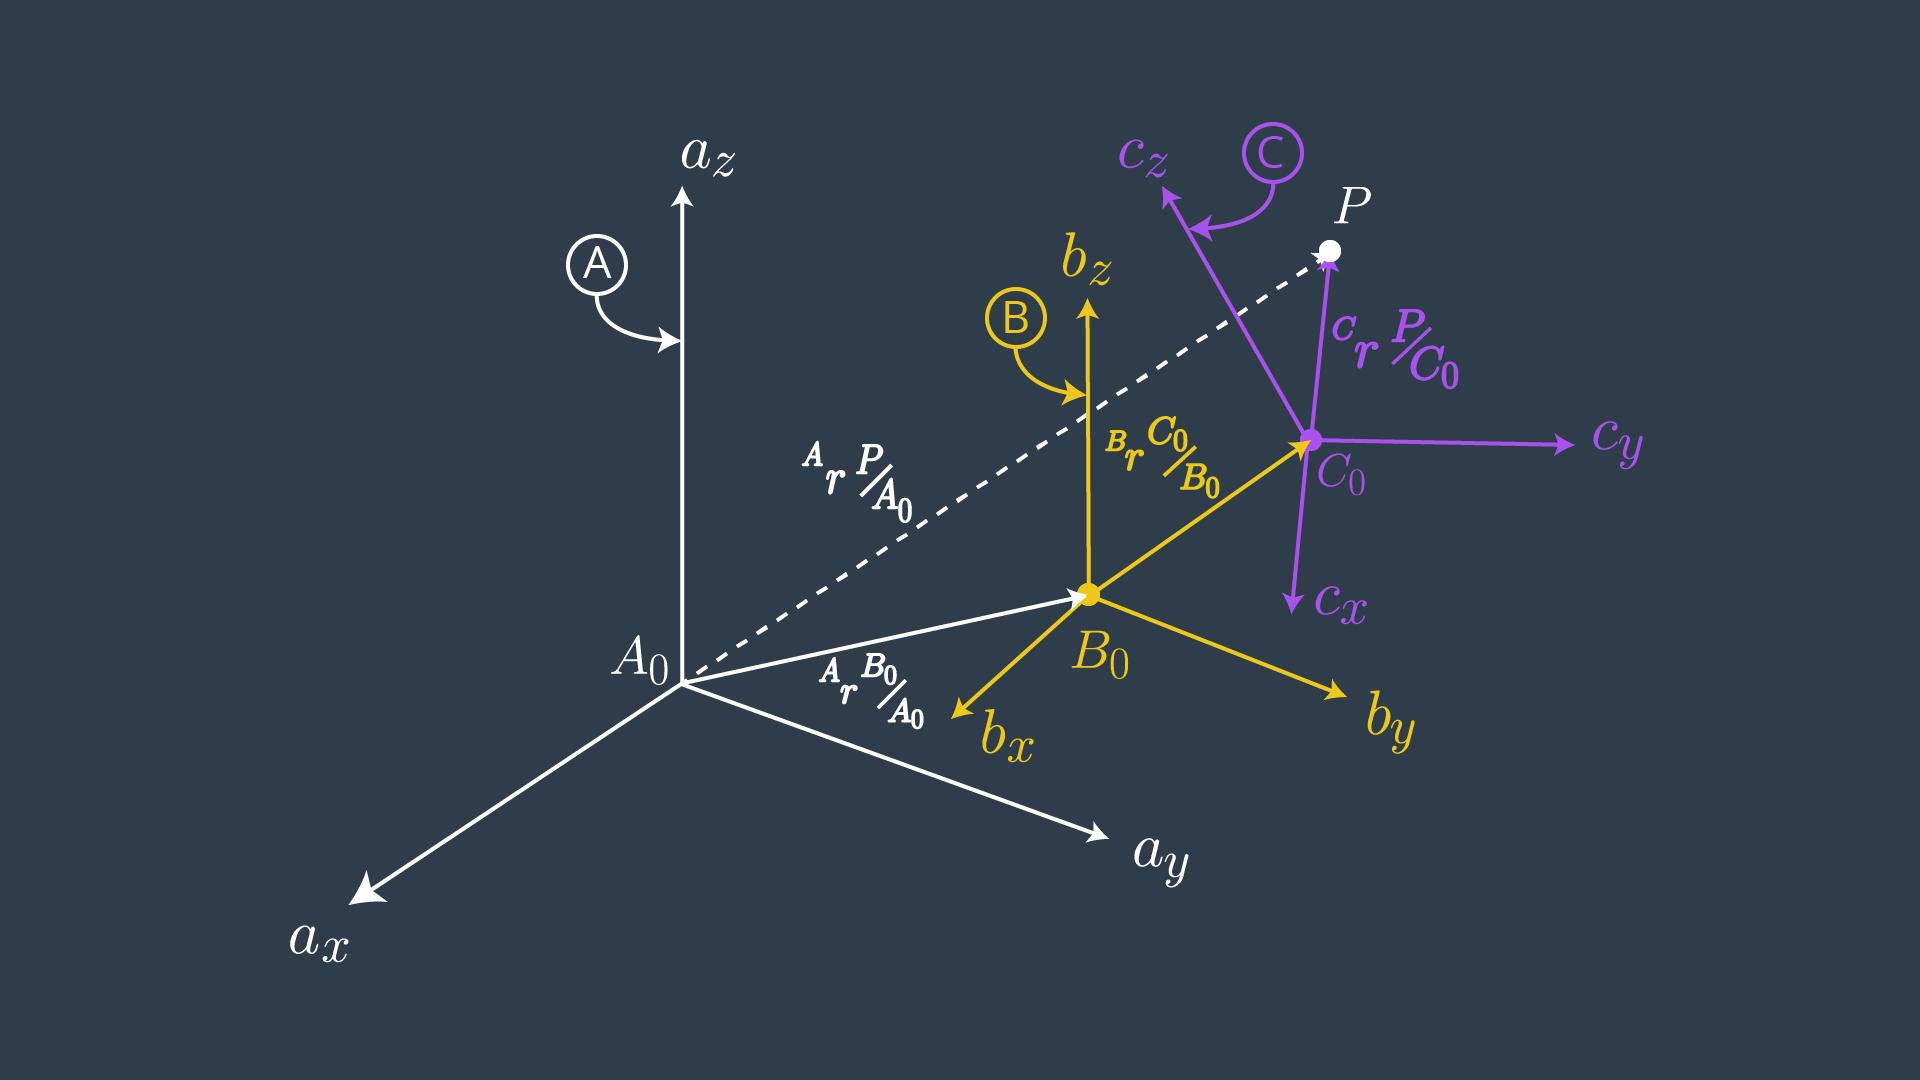

Assume the transform from frame C relative to frame B is known, as is the transform from B to A. It is possible then to express ${^{C}\textbf{r}_{P/C_{0}}}$ in terms of frame A by first transforming it to the frame B,


$${ \scriptsize{(1)} }$$

and then by transforming to the A frame, 


$${ \scriptsize{(2)} }$$

Perhaps not surprisingly, equations (1) and (2) can be combined as, 



For completeness, let's expand the transform between A and C in terms of its known components,

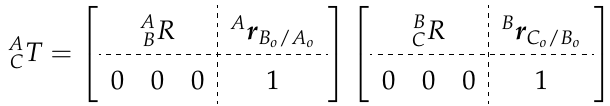
$${ \scriptsize{(3)} }$$

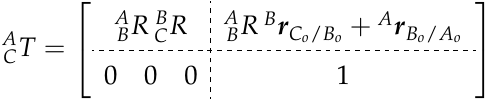
$${ \scriptsize{(4)} }$$


The upper left 3x3 submatrix in equation (4) should look familiar; it is a composition of rotations between A and C.

${ \large \frac{A}{B}\textbf{R}^{B}\textbf{r}_{ C_{0}/B_{0} } }$ is the vector from ${B_{0}}$ to ${C_{0}}$ expressed in the A frame. The final term, ${ \large ^{A}\textbf{r}_{ B_{0}/A_{0} } }$ is the vector from ${A_{0}}$ to ${B_{0}}$ expressed in A.

To help solidify the concepts of transforms, inverse transforms, and composition of transforms, consider one more example. Here we have frames A through E.

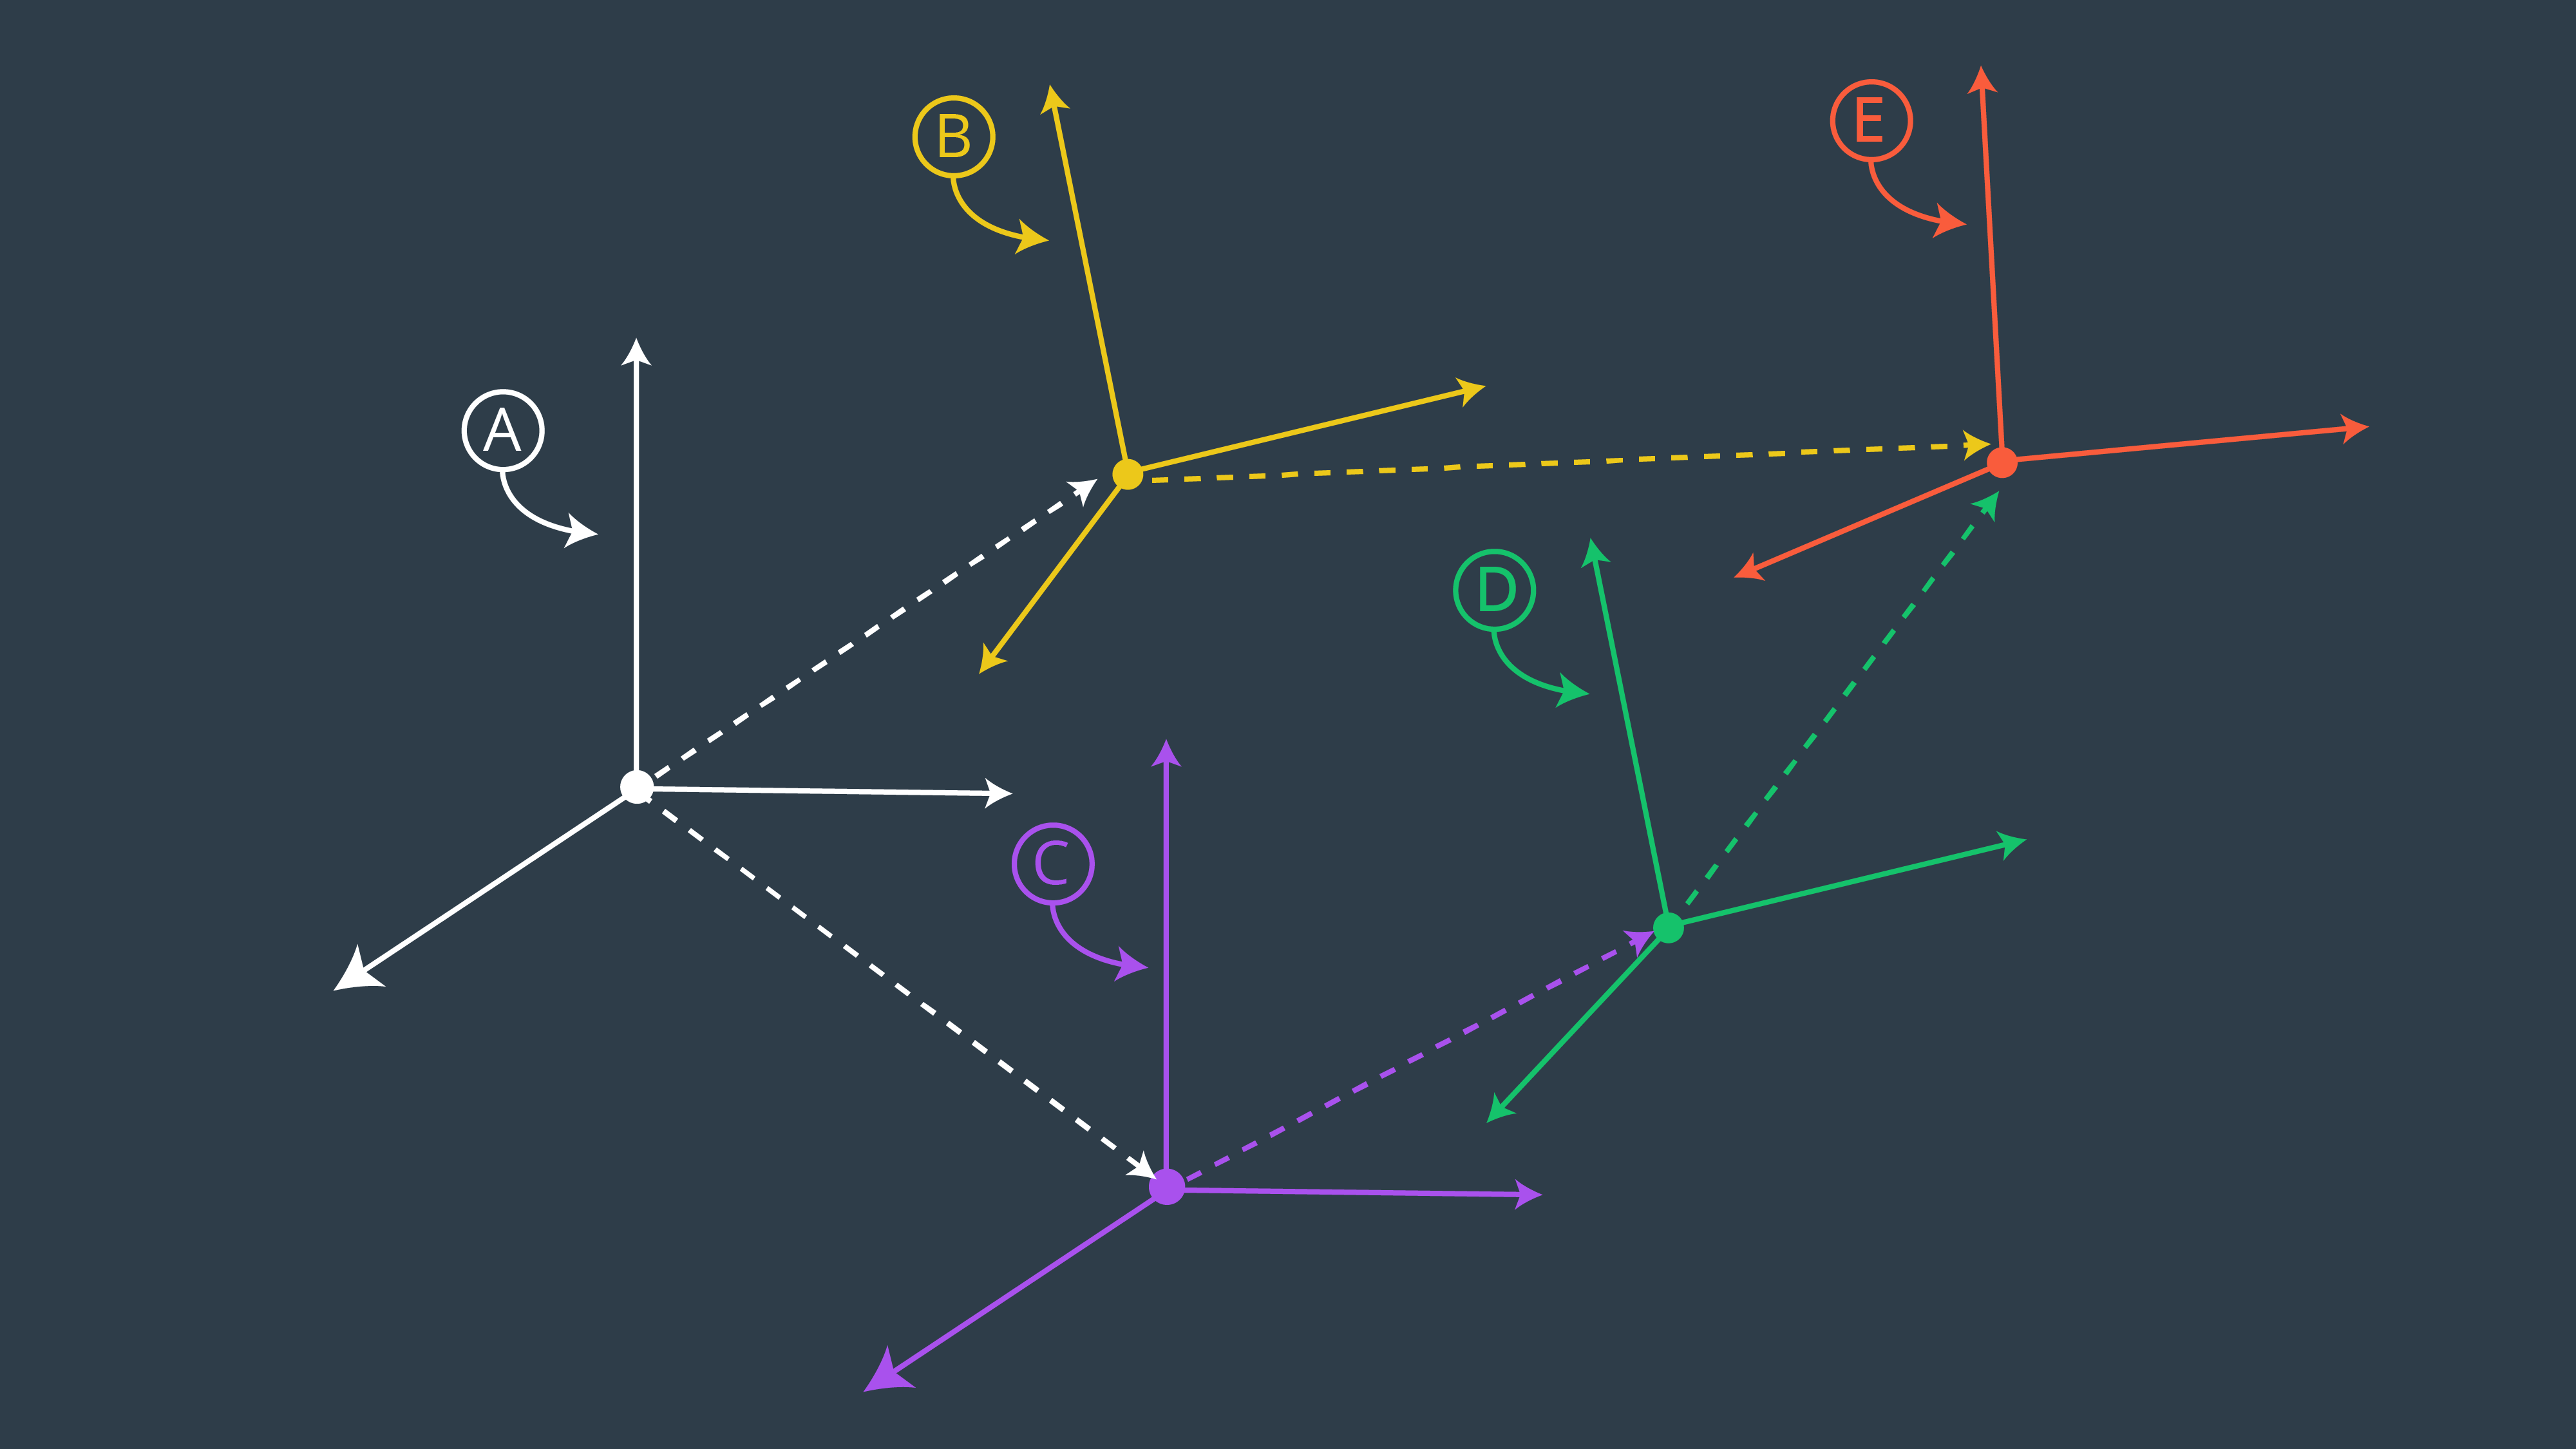

Let’s say we wish to create the transform between frames A and E; clearly, there are two paths. One route has transforms,

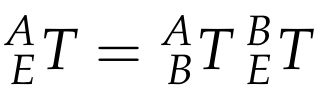
$${ \scriptsize{(5)} }$$

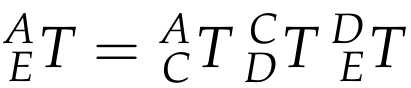
$${ \scriptsize{(6)} }$$

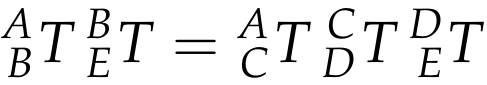
$${ \scriptsize{(7)} }$$


The following steps are taken to obtain coordinate frame E from frame A.

From Frame A to B to E:

* Frame A: Located at [0, 0, 0]
* Frame B: Rotate Frame A about a_y by -90 degrees. Translate A by [-2, 2, 4]
* Frame E: Rotate Frame B about b_x by 90 degrees. Translate B by [0, 2, 0]


From Frame A to C to D to E:

* Frame C: Translate A by [4, 4, 0]
* Frame D: Rotate Frame C about c_x by 90 degrees. Translate C by [-3, 3, 2]
* Frame E: Rotate Frame D about d_Z by 90 degrees. Translate D by [-3, 2, 3]

In [19]:
#!/usr/bin/env python

from sympy import symbols, cos, sin, pi, sqrt, simplify, eye
from sympy.matrices import Matrix

# Conversion Factors
rtd = 180./pi # radians to degrees
dtr = pi/180. # degrees to radians

# Nice printing
from sympy import init_printing
init_printing()

In [20]:
### Create symbols for joint variables
# The numbers 1 to 4 correspond to each rotation in the order specified to you.
q1, q2, q3, q4 = symbols('q1:5')

In [21]:
### Define functions for Rotation Matrices about x, y, and z given specific angle.
def rot_x(q):
    R_x = Matrix([[ 1,            0,        0],
                  [ 0,        cos(q), -sin(q)],
                  [ 0,        sin(q),  cos(q)]])
    
    return R_x
    
print('Example: find the rotation on the x-axis of pi/4')
rot_x(pi/4)

Example: find the rotation on the x-axis of pi/4


⎡1  0    0  ⎤
⎢           ⎥
⎢   √2  -√2 ⎥
⎢0  ──  ────⎥
⎢   2    2  ⎥
⎢           ⎥
⎢   √2   √2 ⎥
⎢0  ──   ── ⎥
⎣   2    2  ⎦

In [22]:
def rot_y(q):              
    R_y = Matrix([[ cos(q),        0, sin(q)],
                  [      0,        1,      0],
                  [-sin(q),        0, cos(q)]])
    
    return R_y

print('Example: find the rotation on the Y-axis of pi/3')
rot_y(pi/3)

Example: find the rotation on the Y-axis of pi/3


⎡         √3 ⎤
⎢1/2   0  ── ⎥
⎢         2  ⎥
⎢            ⎥
⎢ 0    1   0 ⎥
⎢            ⎥
⎢-√3         ⎥
⎢────  0  1/2⎥
⎣ 2          ⎦

In [23]:
def rot_z(q):    
    R_z = Matrix([[ cos(q), -sin(q), 0],
                  [ sin(q),  cos(q), 0],
                  [      0,       0, 1]])
    return R_z
              
print('Example: find the rotation on the Z-axis of 2pi/3')
rot_z(2*pi/3)

Example: find the rotation on the Z-axis of 2pi/3


⎡      -√3    ⎤
⎢-1/2  ────  0⎥
⎢       2     ⎥
⎢             ⎥
⎢ √3          ⎥
⎢ ──   -1/2  0⎥
⎢ 2           ⎥
⎢             ⎥
⎣ 0     0    1⎦

In [87]:
### Define rotations between frames
# Initial Rotation Matrix for Frame A  
# (Also when no rotation is specified)

Ra = eye(3)


In [88]:
# Rotations performed on individual Frames for A->B->E
Rb_a = rot_y(q1)
Re_b = rot_x(q2)


In [89]:
# Rotations performed on individual Frames for A->C->D->E
Rc_a = eye(3)
Rd_c = rot_x(q3)
Re_d = rot_z(q4)


In [90]:
### Define Translations between frames.

tb_a = Matrix([-2,2,4])
te_b = Matrix([0,2,0])
tc_a = Matrix([4,4,0])
td_c = Matrix([-3,3,2])
te_d = Matrix([-3,2,3])


In [91]:
### Define homogenous transformation matrices
# HINT: Check out sympy's documentation for functions row_join and col_join
Ta = eye(4)
col_joiner = Matrix([[0,0,0,1]])

# need a 4x3 rotation/transformation matrix
Tb_a = (Rb_a.row_join(tb_a)).col_join(col_joiner)
Te_b = (Re_b.row_join(te_b)).col_join(col_joiner)

Tc_a = (Rc_a.row_join(tc_a)).col_join(col_joiner)
Td_c = (Rd_c.row_join(td_c)).col_join(col_joiner)
Te_d = (Re_d.row_join(te_d)).col_join(col_joiner)         


In [98]:
### Composition of Transformations
Te_a_1 = simplify(Ta * Tb_a * Te_b)

### Calculate orientation and position for E
E_1 = Te_a_1.evalf(subs={q1: -pi/2, q2: pi/2}, chop = True)

print("Transformation Matrix for A->B->E:")
E_1

Transformation Matrix for A->B->E:


⎡ 0   -1.0   0    -2.0⎤
⎢                     ⎥
⎢ 0    0    -1.0  4.0 ⎥
⎢                     ⎥
⎢1.0   0     0    4.0 ⎥
⎢                     ⎥
⎣ 0    0     0    1.0 ⎦

In [99]:
Te_a_2 = simplify(Ta * Tc_a * Td_c * Te_d)
E_2 = Te_a_2.evalf(subs={q3: pi/2, q4: pi/2}, chop = True)

print("Transformation Matrix for A->C->D->E:")
E_2

Transformation Matrix for A->C->D->E:


⎡ 0   -1.0   0    -2.0⎤
⎢                     ⎥
⎢ 0    0    -1.0  4.0 ⎥
⎢                     ⎥
⎢1.0   0     0    4.0 ⎥
⎢                     ⎥
⎣ 0    0     0    1.0 ⎦